In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression--------------------

In [2]:
data = pd.read_csv(r'C:\\Users\Bita\Desktop\data\StudentsPerformance.csv')
data.drop(['test preparation course'],axis=1,inplace=True)
data

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95
996,male,group C,high school,free/reduced,62,55,55
997,female,group C,high school,free/reduced,59,71,65
998,female,group D,some college,standard,68,78,77


In [3]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.replace({
    'gender': {'female': 0, 'male': 1},
    'lunch': {'standard': 1, 'free/reduced': 0},
    # 'test preparation course' : {'none' :1 , 'completed':0}
}, inplace=True)

In [6]:
new_data=pd.get_dummies(data, columns=['race/ethnicity', 'parental level of education'], drop_first=True).astype(int)

In [7]:
new_data.head()

,gender,lunch,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,72,72,74,1,0,0,0,1,0,0,0,0
1,0,1,69,90,88,0,1,0,0,0,0,0,1,0
2,0,1,90,95,93,1,0,0,0,0,0,1,0,0
3,1,0,47,57,44,0,0,0,0,0,0,0,0,0
4,1,1,76,78,75,0,1,0,0,0,0,0,1,0


In [8]:
x = new_data.drop(columns=['math score'])
y = new_data['math score']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R² score:', r2_score(y_test, y_pred))

RMSE: 5.705547009276465
R² score: 0.8662222375298612


C:\Users\Bita\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
new_data.corr(numeric_only=True)['math score'].sort_values(ascending=False)

math score                                       1.000000
reading score                                    0.817580
writing score                                    0.802642
lunch                                            0.350877
race/ethnicity_group E                           0.205855
gender                                           0.167982
parental level of education_bachelor's degree    0.079664
parental level of education_master's degree      0.060417
race/ethnicity_group D                           0.050071
parental level of education_some college         0.037056
race/ethnicity_group C                          -0.073387
parental level of education_some high school    -0.079852
race/ethnicity_group B                          -0.084250
parental level of education_high school         -0.128725
Name: math score, dtype: float64

In [14]:
new_data[['parental level of education_some college', 'math score']].corr().loc['parental level of education_some college', 'math score']

0.03705631752269759

In [15]:
print(len(x), len(y))
y_pred = model.predict(x)
print(len(y_pred))

1000 1000
1000


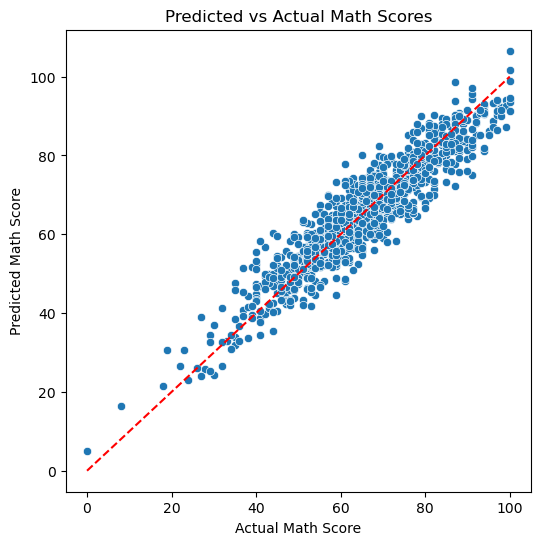

In [16]:
import seaborn as sns
results_df = pd.DataFrame({
    'Actual': y.values,     
    'Predicted': y_pred
})

plt.figure(figsize=(6,6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         'r--')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Predicted vs Actual Math Scores')
plt.show()

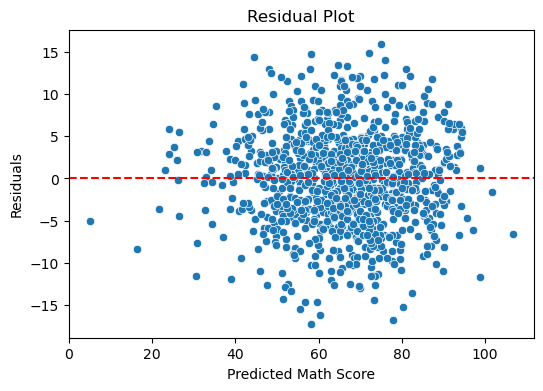

In [17]:
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']
plt.figure(figsize=(6,4))
sns.scatterplot(x=results_df['Predicted'], y=results_df['Residuals'])
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Math Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Gradient Descent----------------------

In [18]:
x = new_data.drop(columns=['math score'])
y = new_data['math score']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [23]:
X_train_gd = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_gd = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [24]:
theta = np.zeros(X_train_gd.shape[1])
learning_rate = 0.001
n_iterations = 1000
m = len(X_train_gd)
y_train_np = y_train.values

In [25]:
for iteration in range(n_iterations):
    gradients = (2/m) * X_train_gd.T.dot(X_train_gd.dot(theta) - y_train_np)
    theta -= learning_rate * gradients

In [26]:
y_pred_gd = X_test_gd.dot(theta)

In [27]:
mask = ~np.isnan(y_pred_gd)
y_pred_gd_clean = y_pred_gd[mask]
y_test_clean = y_test.values[mask]

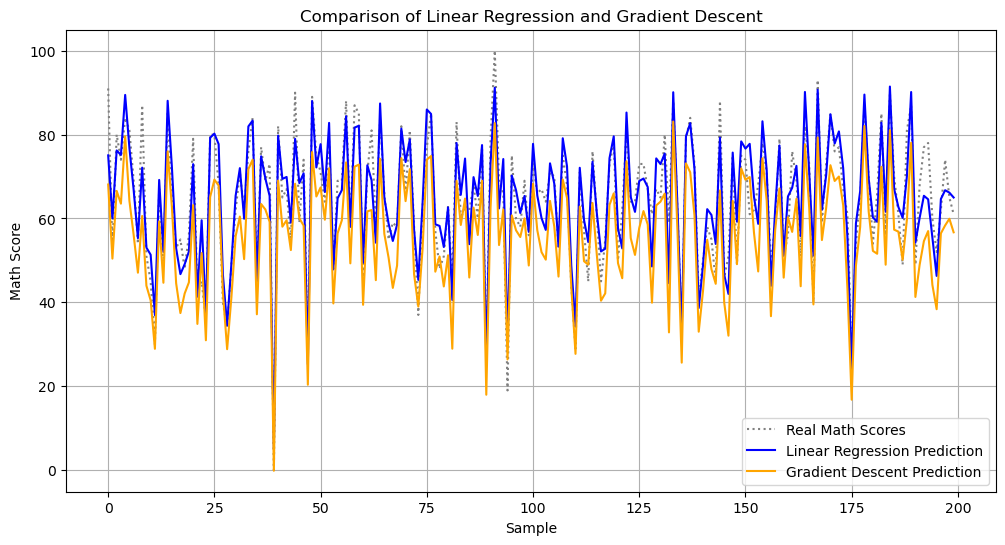

In [28]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Real Math Scores', linestyle='dotted', color='gray')
plt.plot(y_pred_lr, label='Linear Regression Prediction', color='blue')
plt.plot(y_pred_gd_clean, label='Gradient Descent Prediction', color='orange')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Sample')
plt.ylabel('Math Score')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# classification--------------------------------

In [32]:
# نمره ریاضی کم‌تر یا مساوی ۷۰ → کلاس 0
# نمره ریاضی بیش‌تر از ۷۰ → کلاس 1
from sklearn.linear_model import LogisticRegression

new_x = new_data[['reading score', 'writing score']] 
new_y = new_data['math score']  

new_data['math score'] = (new_data['math score'] > 70).astype(int) 

# new_y = new_data['math score']

X_train, X_test, y_train, y_test = train_test_split(new_x,new_y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

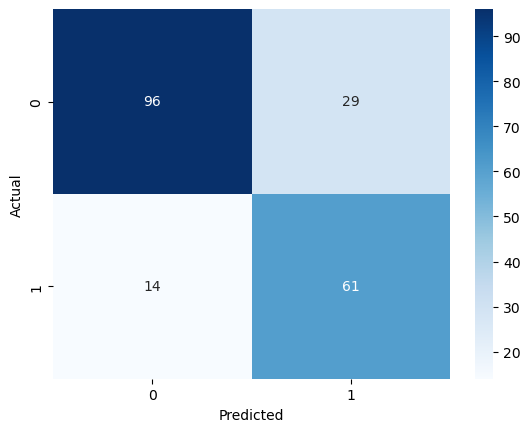

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Classification Report:\n", df_report)

Classification Report:
               precision    recall  f1-score  support
0              0.872727  0.768000  0.817021  125.000
1              0.677778  0.813333  0.739394   75.000
accuracy       0.785000  0.785000  0.785000    0.785
macro avg      0.775253  0.790667  0.778208  200.000
weighted avg   0.799621  0.785000  0.787911  200.000


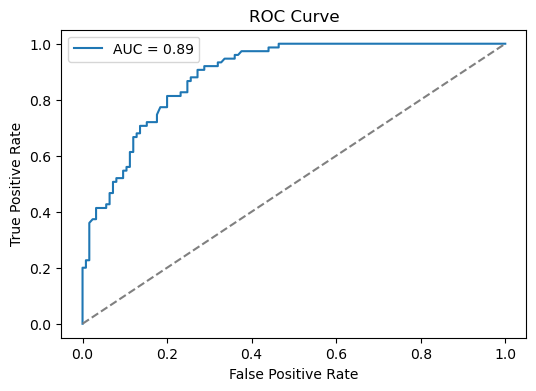

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
y_prob = model.predict_proba(X_test)[:,1]  # احتمال کلاس 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()